In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim

In [2]:
import plotly.express as px
import plotly.graph_objs as go

In [3]:
# Opening file

names = ["Dis No"]

#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [4]:
#there are also data for technological disasters so we are choosing Natural Disasters

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
# print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]



#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


## Get the GDP per captia for all countries*

In [5]:
Countries_GDPC = pd.read_excel('GDP_per_capita.xls')

In [6]:
Countries_GDPC

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
265,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
266,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
267,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [7]:
# Drop the first 3 rows of the DataFrame
Countries_GDPC = Countries_GDPC.drop([0, 1])

# Set the 4th row as the column index
Countries_GDPC.columns = Countries_GDPC.iloc[0]
Countries_GDPC = Countries_GDPC.drop(Countries_GDPC.index[0])

Countries_GDPC.index = Countries_GDPC.index.astype(int)
Countries_GDPC = Countries_GDPC.reset_index(drop=True)

In [8]:
Countries_GDPC = Countries_GDPC.drop('Indicator Name', axis=1)

In [9]:
Countries_GDPC = Countries_GDPC.drop('Indicator Code', axis=1)

In [10]:
Countries_GDPC

2,Country Name,Country Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,Africa Eastern and Southern,AFE,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
263,South Africa,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,ZMB,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


### Rename the year columns


In [11]:

old_names = list(Countries_GDPC.columns)
old_names = old_names[2:]

In [12]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [13]:
Countries_GDPC = Countries_GDPC.rename(columns=name_map)

In [14]:
Countries_GDPC = Countries_GDPC.drop('Country Name', axis=1)

In [15]:
Countries_GDPC

2,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
1,AFE,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
263,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,ZMB,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [16]:
df_melted = Countries_GDPC.melt(id_vars=['Country Code'], var_name='year', value_name='GDPC')

In [17]:
df_melted= df_melted.rename(columns={'Country Code': 'ISO','year':'Year'})

In [18]:
df_melted

,ISO,Year,GDPC
0,ABW,1960,NaN
1,AFE,1960,162.913034
2,AFG,1960,62.369375
3,AFW,1960,106.976475
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,5269.783901
16488,YEM,2021,NaN
16489,ZAF,2021,7055.044776
16490,ZMB,2021,1137.343633


## Get population data

In [19]:
population = pd.read_excel('population.xls')

In [20]:
population

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2023-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0
265,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0
266,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0
267,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0


In [21]:
# Drop the first 2 rows of the DataFrame
population = population.drop([0, 1])

# Set the 4th row as the column index
population.columns = population.iloc[0]
population = population.drop(population.index[0])

population.index = population.index.astype(int)
population = population.reset_index(drop=True)

In [22]:
population

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0


In [23]:
population = population.drop('Indicator Name', axis=1)

In [24]:
population = population.drop('Indicator Code', axis=1)

In [25]:
old_names = list(population.columns)
old_names = old_names[2:]

In [26]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [27]:
population = population.rename(columns=name_map)

In [28]:
population = population.drop('Country Name', axis=1)

In [29]:
population

2,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0
262,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0
263,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0
264,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0


In [30]:
df_melted_pop = population.melt(id_vars=['Country Code'], var_name='year', value_name='population')

In [31]:
df_melted_pop= df_melted_pop.rename(columns={'Country Code': 'ISO','year':'Year'})

In [32]:
df_melted_pop

,ISO,Year,population
0,ABW,1960,54608.0
1,AFE,1960,130692579.0
2,AFG,1960,8622466.0
3,AFW,1960,97256290.0
4,AGO,1960,5357195.0
...,...,...,...
16487,XKX,2021,1786038.0
16488,YEM,2021,32981641.0
16489,ZAF,2021,59392255.0
16490,ZMB,2021,19473125.0


In [33]:
Natural_Disasters.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [34]:
NDdf = Natural_Disasters[['Dis No', 'Country','ISO', 'Region', 'Continent','Year','Total Deaths', 'Total Affected',
       "Total Damages ('000 US$)"]]

In [35]:
NDdf = NDdf[NDdf['Year'] >= 1973]

In [36]:
NDdf

,Dis No,Country,ISO,Region,Continent,Year,Total Deaths,Total Affected,Total Damages ('000 US$)
904,1973-9005-ETH,Ethiopia,ETH,Eastern Africa,Africa,1973,100000.0,3000000.0,76000.0
905,1973-0002-ARG,Argentina,ARG,South America,Americas,1973,60.0,300.0,NaN
906,1973-0051-AUS,Australia,AUS,Australia and New Zealand,Oceania,1973,12.0,12000.0,71000.0
907,1973-0053-BGD,Bangladesh,BGD,Southern Asia,Asia,1973,1000.0,NaN,NaN
908,1973-0023-BGD,Bangladesh,BGD,Southern Asia,Asia,1973,200.0,50000.0,NaN
...,...,...,...,...,...,...,...,...,...
25876,2023-0032-USA,United States of America (the),USA,Northern America,Americas,2023,11.0,49.0,NaN
25878,2023-0080-ZAF,South Africa,ZAF,Southern Africa,Africa,2023,17.0,1000.0,NaN
25879,2023-0110-ZMB,Zambia,ZMB,Eastern Africa,Africa,2023,NaN,154608.0,NaN
25880,2023-0068-ZMB,Zambia,ZMB,Eastern Africa,Africa,2023,2.0,118.0,NaN


In [37]:
ISO_Region_Continent = NDdf[['Country','ISO', 'Region', 'Continent']]
ISO_Region_Continent = ISO_Region_Continent.groupby(['ISO']).first().reset_index()

In [38]:
ISO_Region_Continent

,ISO,Country,Region,Continent
0,AFG,Afghanistan,Southern Asia,Asia
1,AGO,Angola,Middle Africa,Africa
2,AIA,Anguilla,Caribbean,Americas
3,ALB,Albania,Southern Europe,Europe
4,ANT,Netherlands Antilles,Caribbean,Americas
...,...,...,...,...
223,YMN,Yemen Arab Rep,Western Asia,Asia
224,YUG,Yugoslavia,Southern Europe,Europe
225,ZAF,South Africa,Southern Africa,Africa
226,ZMB,Zambia,Eastern Africa,Africa


In [39]:
NDdf_Country = NDdf.groupby(['ISO','Year']).sum()

In [40]:
NDdf_Country

Total Deaths  Total Affected  Total Damages ('000 US$)
ISO Year                                                        
AFG 1976          51.0         80000.0                       0.0
    1978         120.0        271684.0                   52000.0
    1980           0.0         30000.0                       0.0
    1987          70.0             0.0                       0.0
    1988           0.0        161000.0                  260000.0
...                ...             ...                       ...
ZWE 2017         251.0       7013023.0                  189000.0
    2018          12.0          5164.0                       0.0
    2019         654.0        270186.0                       0.0
    2021           3.0        169900.0                       0.0
    2022         750.0          9551.0                       0.0

[4731 rows x 3 columns]

In [41]:
df_melted['Year'] = df_melted['Year'].astype('int64')
df_melted_pop['Year'] = df_melted_pop['Year'].astype('int64')

In [42]:
ND_GDPC_Country = pd.merge(NDdf_Country, df_melted, on=['ISO','Year'])

In [43]:
ND_GDPC_Country = pd.merge(ND_GDPC_Country , df_melted_pop, on=['ISO','Year'])

In [44]:
ND_GDPC_Country

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population
0,AFG,1976,51.0,80000.0,0.0,205.674097,12425267.0
1,AFG,1978,120.0,271684.0,52000.0,255.045622,12938862.0
2,AFG,1980,0.0,30000.0,0.0,291.649791,12486631.0
3,AFG,1987,70.0,0.0,0.0,NaN,10322758.0
4,AFG,1988,0.0,161000.0,260000.0,NaN,10383460.0
...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0


In [45]:
ND_GDPC = pd.merge(ND_GDPC_Country, ISO_Region_Continent, on=['ISO'])

In [46]:
ND_GDPC

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent
0,AFG,1976,51.0,80000.0,0.0,205.674097,12425267.0,Afghanistan,Southern Asia,Asia
1,AFG,1978,120.0,271684.0,52000.0,255.045622,12938862.0,Afghanistan,Southern Asia,Asia
2,AFG,1980,0.0,30000.0,0.0,291.649791,12486631.0,Afghanistan,Southern Asia,Asia
3,AFG,1987,70.0,0.0,0.0,NaN,10322758.0,Afghanistan,Southern Asia,Asia
4,AFG,1988,0.0,161000.0,260000.0,NaN,10383460.0,Afghanistan,Southern Asia,Asia
...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa


In [47]:
ND_GDPC['Deaths per 100K'] = (ND_GDPC['Total Deaths']/ND_GDPC['population'])*1000000

In [48]:
ND_GDPC['Affected per 100K'] = (ND_GDPC['Total Affected']/ND_GDPC['population'])*1000000

In [49]:
ND_GDPC

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent,Deaths per 100K,Affected per 100K
0,AFG,1976,51.0,80000.0,0.0,205.674097,12425267.0,Afghanistan,Southern Asia,Asia,4.104540,6438.493434
1,AFG,1978,120.0,271684.0,52000.0,255.045622,12938862.0,Afghanistan,Southern Asia,Asia,9.274386,20997.518947
2,AFG,1980,0.0,30000.0,0.0,291.649791,12486631.0,Afghanistan,Southern Asia,Asia,0.000000,2402.569596
3,AFG,1987,70.0,0.0,0.0,NaN,10322758.0,Afghanistan,Southern Asia,Asia,6.781133,0.000000
4,AFG,1988,0.0,161000.0,260000.0,NaN,10383460.0,Afghanistan,Southern Asia,Asia,0.000000,15505.428826
...,...,...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa,2.144927,138.382409
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa,17.015679,475423.698882
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa,0.797227,343.073138
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa,42.593077,17596.411449


In [50]:
ND_GDPC_Continent = ND_GDPC.groupby(['Continent','Year']).agg({'Total Deaths': 'sum','Total Affected': 'sum', "Total Damages ('000 US$)": 'sum','Deaths per 100K':'sum',
                                                               'Affected per 100K':'sum', 'GDPC' :'mean'}) 

In [51]:
ND_GDPC_Continent

Total Deaths  Total Affected  Total Damages ('000 US$)  \
Continent Year                                                           
Africa    1973      119132.0       3438240.0                   91000.0   
          1974          62.0       2004500.0                   34000.0   
          1975          54.0       1094308.0                  203600.0   
          1976         412.0       7856444.0                  317000.0   
          1977         937.0        743730.0                  418000.0   
...                      ...             ...                       ...   
Oceania   2017          12.0         61094.0                 3303000.0   
          2018           9.0        268760.0                 1296400.0   
          2019         121.0         43672.0                 4000000.0   
          2020          79.0        579530.0                 4135120.0   
          2021          14.0        130841.0                 3622000.0   

                Deaths per 100K  Affected per 100K          GDPC  
Continent Year                                                    
Africa    1973      8003.291779       1.874680e+05    293.692613  
          1974         3.357977       4.423234e+05    583.670042  
          1975        14.194781       9.512085e+05    373.635862  
          1976        23.321472       2.277799e+06    301.450268  
          1977        69.384801       4.266644e+05    501.026183  
...                         ...                ...           ...  
Oceania   2017         0.487920       2.834550e+04  29909.322179  
          2018        47.375278       1.030966e+06  16700.509990  
          2019       394.364519       1.303529e+05  12731.651833  
          2020        89.749885       1.598557e+06  14413.360568  
          2021         6.956936       1.406079e+06  28124.364405  

[245 rows x 6 columns]

In [63]:
ND_GDPC_Continent_d = ND_GDPC_Continent['Deaths per 100K']
ND_GDPC_Continent_a = ND_GDPC_Continent['Affected per 100K']
ND_GDPC_Continent_M = ND_GDPC_Continent["Total Damages ('000 US$)"]
ND_GDPC_Continent_GDPC = ND_GDPC_Continent['GDPC']

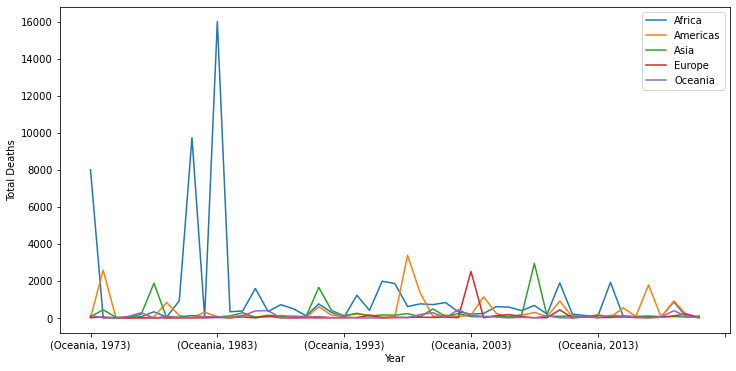

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_d.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel('Total Deaths')
ax.legend()
plt.show()

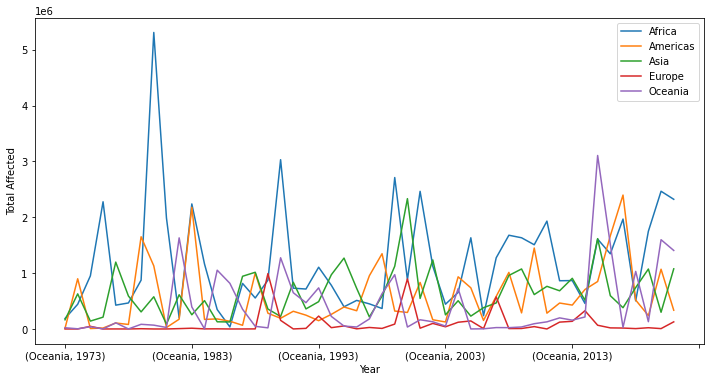

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_a.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel('Total Affected')
ax.legend()
plt.show()

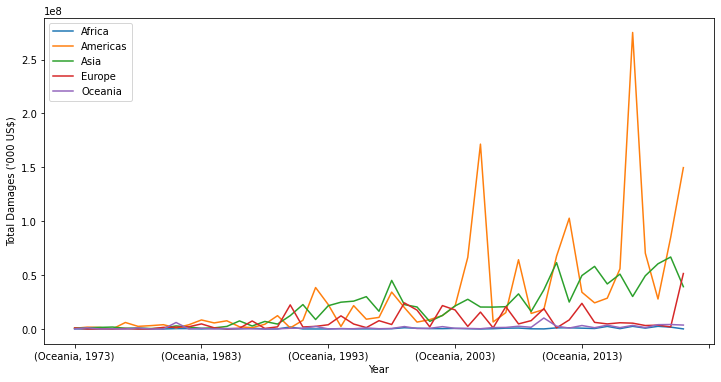

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_M.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel("Total Damages ('000 US$)")
ax.legend()
plt.show()

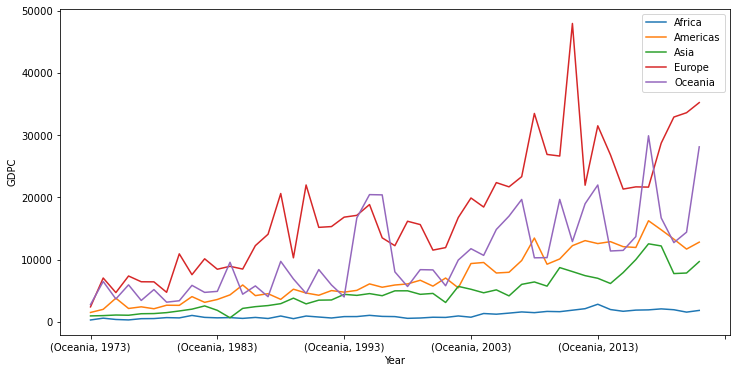

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
for continent, data in ND_GDPC_Continent_GDPC.groupby('Continent'):
    data.plot(ax=ax, label=continent)
    
ax.set_xlabel('Year')
ax.set_ylabel('GDPC')
ax.legend()
plt.show()

In [70]:
ND_GDPC_1910 = ND_GDPC[ND_GDPC['Year'] >= 2010]

In [71]:
ND_GDPC_1985 = ND_GDPC[ND_GDPC['Year'] >= 1985]

In [72]:
years = list(range(1992, 2022))

In [73]:
ND_GDPC_1992

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent,Deaths per 100K,Affected per 100K
7,AFG,1992,600.0,4000.0,4000.0,NaN,12057433.0,Afghanistan,Southern Asia,Asia,49.761836,331.745571
8,AFG,1993,110.0,0.0,0.0,NaN,14003760.0,Afghanistan,Southern Asia,Asia,7.855033,0.000000
9,AFG,1995,27.0,7500.0,0.0,NaN,16418912.0,Afghanistan,Southern Asia,Asia,1.644445,456.790316
10,AFG,1996,70.0,9855.0,0.0,NaN,17106595.0,Afghanistan,Southern Asia,Asia,4.091989,576.093606
11,AFG,1997,170.0,20750.0,0.0,NaN,17788819.0,Afghanistan,Southern Asia,Asia,9.556565,1166.463046
...,...,...,...,...,...,...,...,...,...,...,...,...
4432,ZWE,2016,31.0,2000.0,0.0,1421.787789,14452704.0,Zimbabwe,Eastern Africa,Africa,2.144927,138.382409
4433,ZWE,2017,251.0,7013023.0,189000.0,1192.107012,14751101.0,Zimbabwe,Eastern Africa,Africa,17.015679,475423.698882
4434,ZWE,2018,12.0,5164.0,0.0,2269.177012,15052184.0,Zimbabwe,Eastern Africa,Africa,0.797227,343.073138
4435,ZWE,2019,654.0,270186.0,0.0,1421.868596,15354608.0,Zimbabwe,Eastern Africa,Africa,42.593077,17596.411449


In [74]:
ND_GDPC_1992['Year'].max()

2021

In [75]:
ND_GDPC_2010['Affected per 100K'].max()

NameError: name 'ND_GDPC_2010' is not defined

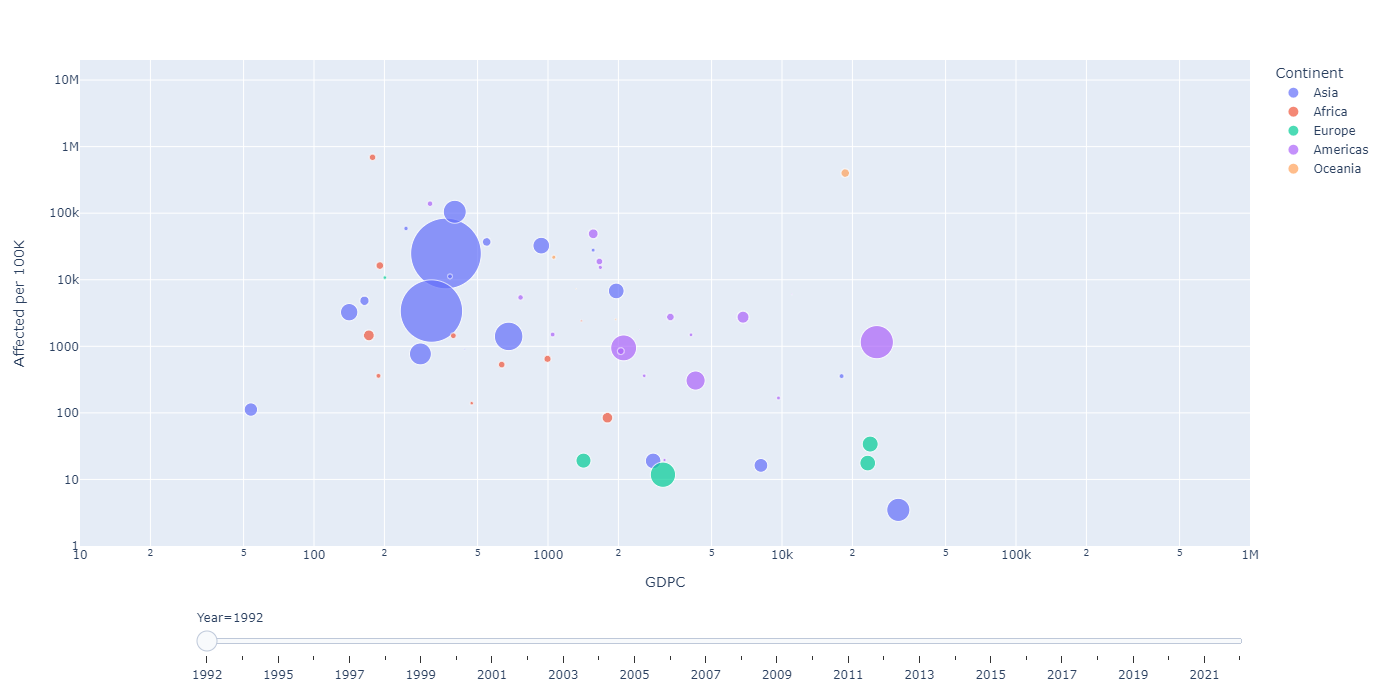

In [81]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(ND_GDPC_1992, x="GDPC", y="Affected per 100K", animation_frame="Year", animation_group="Country",
           size="population", color="Continent", hover_name="Country",
           log_x=True, log_y=True, size_max=55, range_x=[10,1000000], range_y=[1,20000000])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(width=900, height=700)
fig.show()

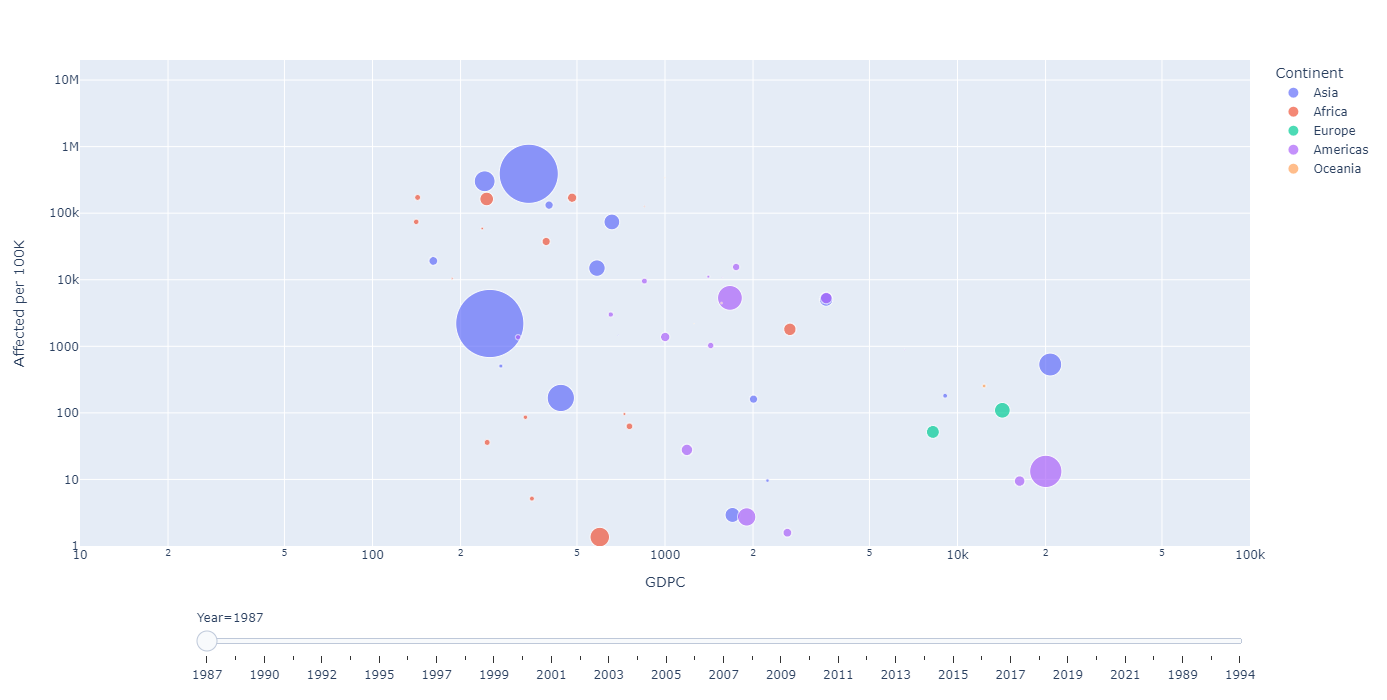

In [77]:
df = px.data.gapminder()
fig = px.scatter(ND_GDPC_1985, x="GDPC", y="Affected per 100K", animation_frame="Year", animation_group="Country",
           size="population", color="Continent", hover_name="Country",
           log_x=True, log_y=True, size_max=55, range_x=[10,100000], range_y=[1,20000000])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(width=900, height=700)
fig.show()

In [78]:
ND_GDPC_2019 = ND_GDPC[ND_GDPC['Year']==2019]

In [79]:
ND_GDPC_2019 

,ISO,Year,Total Deaths,Total Affected,Total Damages ('000 US$),GDPC,population,Country,Region,Continent,Deaths per 100K,Affected per 100K
33,AFG,2019,171.0,130942.0,0.0,500.522664,37769499.0,Afghanistan,Southern Asia,Asia,4.527463,3466.871509
62,AGO,2019,71.0,16520.0,0.0,2142.238757,32353588.0,Angola,Middle Africa,Africa,2.194502,510.607973
123,ARG,2019,14.0,70383.0,0.0,9963.672506,44938712.0,Argentina,South America,Americas,0.311535,1566.199761
132,ARM,2019,0.0,11700.0,0.0,4828.505178,2820602.0,Armenia,Western Asia,Asia,0.000000,4148.050664
190,AUS,2019,35.0,19410.0,4000000.0,54941.434179,25340217.0,Australia,Australia and New Zealand,Oceania,1.381204,765.976077
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,WSM,2019,83.0,5617.0,0.0,4308.272753,211905.0,Samoa,Polynesia,Oceania,391.684953,26507.161228
4341,YEM,2019,958.0,601528.0,0.0,NaN,31546691.0,Yemen,Western Asia,Asia,30.367686,19067.863568
4380,ZAF,2019,102.0,754520.0,185000.0,6688.787271,58087055.0,South Africa,Southern Africa,Africa,1.755985,12989.468996
4409,ZMB,2019,4.0,1430000.0,0.0,1268.120941,18380477.0,Zambia,Eastern Africa,Africa,0.217622,77799.939577


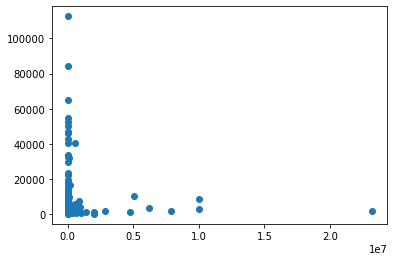

In [80]:
plt.scatter(ND_GDPC_2019['Total Affected'],ND_GDPC_2019['GDPC'] )
plt.show()

In [ ]:
fig, ax = plt.scatter(ND_GDPC_2019['Total Deaths'],ND_GDPC_2019['GDPC'] )
ax.set_xscale("log");
plt.show()

In [ ]:
ND_GDPC_10_23 = ND_GDPC_Country[ND_GDPC_Country['Year']>=2010]

In [ ]:
ND_GDPC_10_23 = ND_GDPC_10_23.groupby('Country').agg({'Total Deaths': 'sum','Total Affected': 'sum', "Total Damages ('000 US$)": 'sum', 'GDPC':'mean'}) 

In [ ]:
plt.scatter(ND_GDPC_10_23 ['Total Affected'],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [ ]:
plt.scatter(ND_GDPC_10_23 ['Total Deaths'],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [ ]:
plt.scatter(ND_GDPC_10_23 ["Total Damages ('000 US$)"],ND_GDPC_10_23 ['GDPC'] )
plt.show()

In [ ]:
ND_GDPC_10_23['GDPC'].max()

In [ ]:
ND_GDPC_10_23['Total Affected'].max()

In [ ]:
max_affected_idx = ND_GDPC_10_23['Total Affected'].idxmax()
max_affected_row = ND_GDPC_10_23.loc[max_affected_idx]

print(max_affected_row)

In [ ]:
NDdf_Continent = NDdf.groupby(['Continent','Year']).sum()

In [ ]:
NDdf_Continent

In [ ]:
ND_GDPC_Country = pd.merge(NDdf_Country, df_melted, on=['Country','Year'])

In [ ]:
NDdf